In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("allenye66/best-lip-reading-dataset")

print("Path to dataset files:", path)

100%|██████████| 733M/733M [00:05<00:00, 137MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/allenye66/best-lip-reading-dataset/versions/4


In [ ]:
import shutil
src = '/root/.cache/kagglehub/datasets/allenye66/best-lip-reading-dataset/versions/4'
dst = 'content/data/'
shutil.move(src, dst)

'content/data/'

In [ ]:
import os
os.listdir()


['.config', 'content', 'sample_data']

In [ ]:
path = 'content/data/outputs'
os.chdir(path)

In [ ]:
file_labels = os.listdir()

In [ ]:
file_labels.sort()

In [ ]:
file_labels

['a_1',
 'a_10',
 'a_11',
 'a_12',
 'a_13',
 'a_14',
 'a_15',
 'a_16',
 'a_17',
 'a_18',
 'a_19',
 'a_2',
 'a_20',
 'a_21',
 'a_22',
 'a_23',
 'a_24',
 'a_25',
 'a_26',
 'a_27',
 'a_28',
 'a_29',
 'a_3',
 'a_30',
 'a_31',
 'a_32',
 'a_33',
 'a_34',
 'a_35',
 'a_36',
 'a_37',
 'a_38',
 'a_39',
 'a_4',
 'a_40',
 'a_41',
 'a_42',
 'a_43',
 'a_44',
 'a_45',
 'a_46',
 'a_47',
 'a_48',
 'a_49',
 'a_5',
 'a_50',
 'a_51',
 'a_52',
 'a_53',
 'a_6',
 'a_7',
 'a_8',
 'a_9',
 'bye_1',
 'bye_10',
 'bye_11',
 'bye_12',
 'bye_13',
 'bye_14',
 'bye_15',
 'bye_16',
 'bye_17',
 'bye_18',
 'bye_19',
 'bye_2',
 'bye_20',
 'bye_21',
 'bye_22',
 'bye_23',
 'bye_24',
 'bye_25',
 'bye_26',
 'bye_27',
 'bye_28',
 'bye_29',
 'bye_3',
 'bye_30',
 'bye_31',
 'bye_32',
 'bye_33',
 'bye_34',
 'bye_35',
 'bye_36',
 'bye_37',
 'bye_38',
 'bye_39',
 'bye_4',
 'bye_40',
 'bye_41',
 'bye_42',
 'bye_43',
 'bye_44',
 'bye_45',
 'bye_46',
 'bye_47',
 'bye_48',
 'bye_49',
 'bye_5',
 'bye_50',
 'bye_51',
 'bye_52',
 'bye_6',

In [ ]:
os.chdir('../')
os.getcwd()

'/content/content/data'

In [ ]:
# only to save file, do not run again
f = open('file_labels.txt', 'a')
for label in file_labels:
    f.write(label + '\n')
f.close()

In [ ]:
extracted_label = []

for label in file_labels:
    lbl, _ = label.split('_')
    extracted_label.append(lbl)

extracted_label

In [ ]:
labels = sorted(set(extracted_label))
class_index = {label : idx for idx, label in enumerate(labels)}
class_index

{'a': 0,
 'bye': 1,
 'can': 2,
 'cat': 3,
 'demo': 4,
 'dog': 5,
 'hello': 6,
 'here': 7,
 'is': 8,
 'lips': 9,
 'my': 10,
 'read': 11,
 'you': 12}

In [ ]:
import torch
import torch.nn.functional as F
class_to_index = torch.tensor([class_index[lbl] for lbl in extracted_label])

class_to_index

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
         4,  4,  4,  4,  4,  4,  4,  4, 

In [ ]:
Y = F.one_hot(class_to_index, num_classes= len(class_index))

In [ ]:
Y_np = Y.numpy()

In [ ]:
Y_np

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
import numpy as np
np.save('Y.npy', Y_np)

In [ ]:
os.getcwd()

'/content/content/data'

In [ ]:
f = open('label.txt', 'a')
for l in labels:
    f.write(l + '\n')

f.close()

Model testing

In [ ]:
os.getcwd()

'/content/content/data/outputs'

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

def load_dataset(data_path, img_size=(64, 64), test_size=0.2, random_state=42):
    all_folders = sorted([f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))])
    Y = np.load(os.path.join(data_path, 'Y.npy'))

    # Ensure labels match folder count
    assert len(Y) == len(all_folders), "Mismatch between number of folders and labels"

    # Split folder indices into train/test
    indices = np.arange(len(all_folders))
    train_idx, test_idx = train_test_split(indices, test_size=test_size, random_state=random_state, stratify=Y)

    def load_split(indices):
        X_split = []
        Y_split = []
        for i in indices:
            folder = all_folders[i]
            folder_path = os.path.join(data_path, folder)
            frame_files = sorted(
                [f for f in os.listdir(folder_path) if f.endswith('.png')],
                key=lambda x: int(x.split('.')[0])
            )
            sequence = []
            for file in frame_files:
                img = cv2.imread(os.path.join(folder_path, file), cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, img_size)
                img = img / 255.0
                sequence.append(img)
            X_split.append(np.array(sequence))
            Y_split.append(Y[i])
        return np.array(X_split)[..., np.newaxis], np.array(Y_split)

    X_train, Y_train = load_split(train_idx)
    X_test, Y_test = load_split(test_idx)

    return X_train, X_test, Y_train, Y_test


## RNN + CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout
import tensorflow as tf


def build_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
X_train, X_test, Y_train, Y_test = load_dataset(os.getcwd())

In [ ]:
X_train.shape

(544, 22, 64, 64, 1)

Plot Helper

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:


model = build_rnn_model(X_train.shape[1:], Y_train.shape[1])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

with tf.device('/GPU:0'):  # or '/CPU:0'
    history = model.fit(X_train, Y_train, epochs=20, batch_size=8, validation_data=(X_test, Y_test))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.0626 - loss: 2.8764 - val_accuracy: 0.0803 - val_loss: 2.5391
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.1241 - loss: 2.5606 - val_accuracy: 0.3723 - val_loss: 2.4187
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.2554 - loss: 2.3405 - val_accuracy: 0.4964 - val_loss: 1.8113
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.4057 - loss: 1.7697 - val_accuracy: 0.7810 - val_loss: 0.7974
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.7558 - loss: 0.8396 - val_accuracy: 0.8686 - val_loss: 0.4893
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8237 - loss: 0.5145 - val_accuracy: 0.9854 - val_loss: 0.1308
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9496 - loss: 0.2338 - val_accuracy: 0.9708 - val_loss: 0.0868
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9687 - loss: 0.1199 - val_accuracy: 0.9927 - v

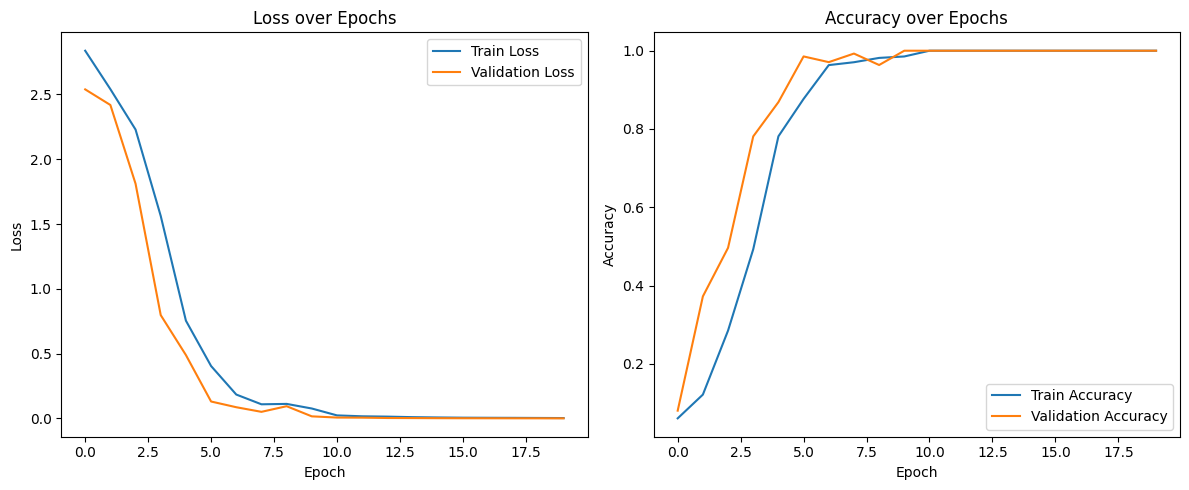

In [ ]:
plot_training_history(history)

In [ ]:
model.save('simple_rnn.keras')

In [ ]:
model.save_weights('simple_rnn.weights.h5')

Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, TimeDistributed, Flatten, LSTM, Dense, Dropout, Reshape

def build_3dcnn_lstm_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)  # (T, H, W, 1)

    # 3D CNN block 1
    x = Conv3D(32, kernel_size=(3, 3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling3D(pool_size=(1, 2, 2))(x)

    # 3D CNN block 2
    x = Conv3D(64, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
    x = MaxPooling3D(pool_size=(1, 2, 2))(x)

    # 3D CNN block 3
    x = Conv3D(128, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
    x = MaxPooling3D(pool_size=(1, 2, 2))(x)

    # Reshape: (T, features)
    t, h, w, c = x.shape[1:]
    x = Reshape((int(t), int(h * w * c)))(x)

    # LSTM
    x = LSTM(128)(x)
    x = Dropout(0.5)(x)

    # Output
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

In [ ]:
model = build_3dcnn_lstm_model(X_train.shape[1:], Y_train.shape[1])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 22, 64, 64, 1)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_3 (Conv3D)                    │ (None, 22, 64, 64, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_3 (MaxPooling3D)       │ (None, 22, 32, 32, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_4 (Conv3D)                    │ (None, 22, 32, 32, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_4 (MaxPooling3D)       │ (None, 22, 16, 16, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_5 (Conv3D)                    │ (None, 22, 16, 16, 128)     │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_5 (MaxPooling3D)       │ (None, 22, 8, 8, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 22, 8192)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 128)                 │       4,260,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,539,597 (17.32 MB)

 Trainable params: 4,539,597 (17.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

with tf.device('/GPU:0'):  # or '/CPU:0'
    history = model.fit(X_train, Y_train, epochs=20, batch_size=8, validation_data=(X_test, Y_test))

Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.0677 - loss: 2.6067 - val_accuracy: 0.1533 - val_loss: 2.5441
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.1542 - loss: 2.4213 - val_accuracy: 0.5328 - val_loss: 1.4055
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.6129 - loss: 1.1725 - val_accuracy: 0.8102 - val_loss: 0.4924
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8346 - loss: 0.5470 - val_accuracy: 0.9489 - val_loss: 0.2312
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9078 - loss: 0.2912 - val_accuracy: 0.9416 - val_loss: 0.1701
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9646 - loss: 0.1492 - val_accuracy: 0.9854 - val_loss: 0.0764
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9806 - loss: 0.0992 - val_accuracy: 0.9854 - val_loss: 0.0539
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9943 - loss: 0.0518 - val_accuracy: 0.9927 - v

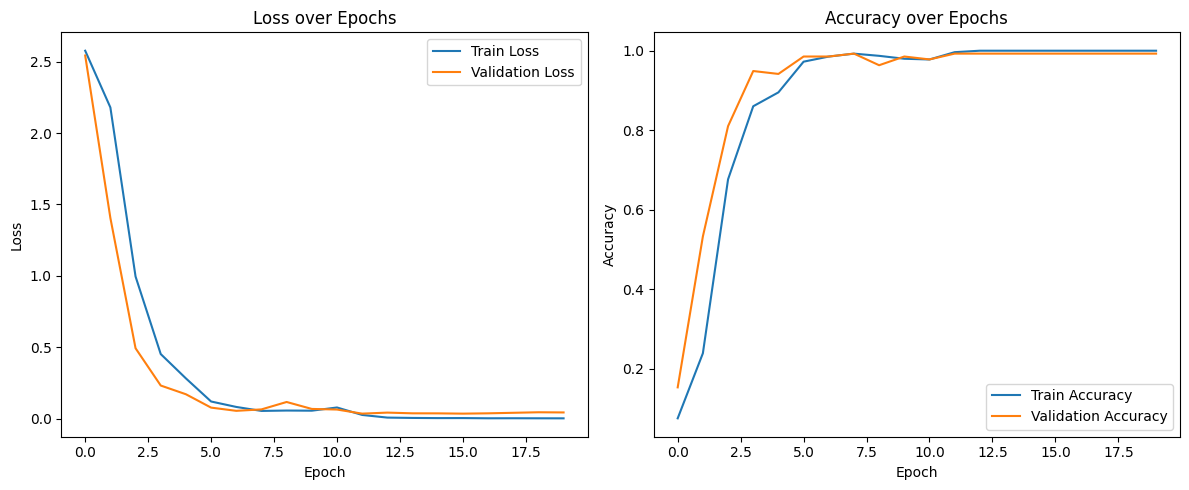

In [ ]:
plot_training_history(history)